# Multivariate Linear Regression with sklearn

#### The program tries to analyse the data set containing house prices in Boston with multivariate linear regression with sklearn

In [1]:
#Importing the libraires
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#Importing and loading the dataset
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

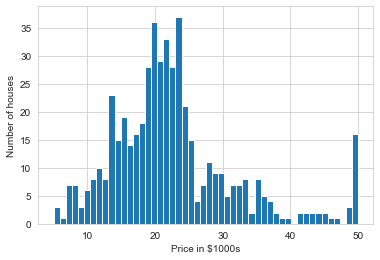

In [3]:
#Visualising the dataset with a histogram of the house prices
plt.hist(boston_data.target,bins=50)
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

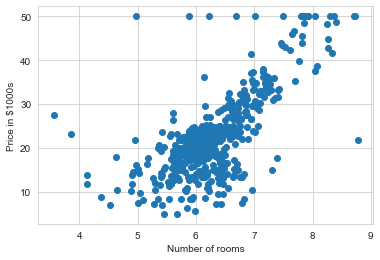

In [5]:
#Making a scatter plot of house prices versus the number of rooms
plt.scatter(boston_data.data[:,5],boston_data.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [6]:
#Making the dataset to into a dataframe
df = DataFrame(boston_data.data)
df.columns = boston_data.feature_names
df['Price'] = boston_data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


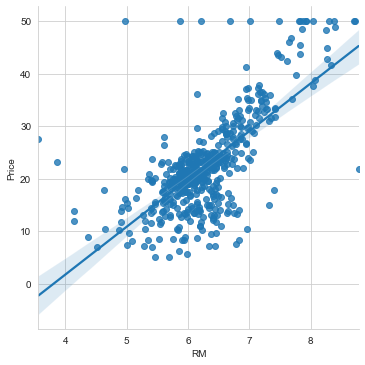

In [7]:
#Scatter plot with seaborn with a linear fit line between price and number of rooms
sns.lmplot('RM','Price',data = df)

In [8]:
#Implementing multivariate regression with scikit learn
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df.drop('Price',1)
y = df.Price
lm.fit(X,y)
print('Intercept coefficient is %.2f ' %lm.intercept_)
print('Coefficients number is %d ' % len(lm.coef_))

Intercept coefficient is 36.46 
Coefficients number is 13 


In [9]:
#Splitting the dataset to train and test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,df.Price)

In [10]:
#House price prediction
lr = LinearRegression()
lr.fit(X_train,Y_train)
#Prediction on train and test result
# Predictions on training and testing sets
prediction_train = lr.predict(X_train)
prediction_test = lr.predict(X_test)

In [11]:
print("MSE on training data: %.2f"  % np.mean((Y_train - prediction_train) ** 2))
    
print("MSE on test data: %.2f"  %np.mean((Y_test - prediction_test) ** 2))

MSE on training data: 21.83
MSE on test data: 22.84


Text(0.5, 1.0, 'Residual Plots')

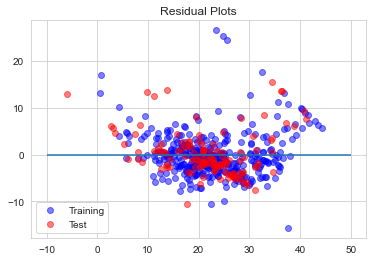

In [12]:
#Creating a residual plot
train = plt.scatter(prediction_train,(Y_train-prediction_train),c='b',alpha=0.5)
test = plt.scatter(prediction_test,(Y_test-prediction_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM', ylabel='Price'>

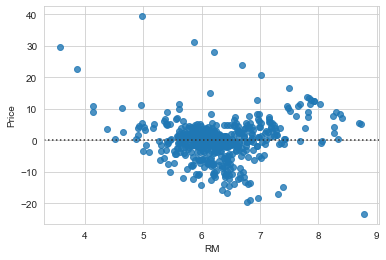

In [13]:
#Residual plot with seaborn
sns.residplot('RM', 'Price', data = df)